### Question 1:  Review the Titanic data(60)

In lecture 3, we use Titanic data as the example for data pre-processing. This dataset contains information about passengers on the Titanic, including features like age, gender, class, and whether they survived or not. Now we are going to fit this data to the three classification models we have discussed. 

In [1]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')

print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


1. Perform the pre-processing steps we have done in the lecture 3, including cleaning the missing values, convert the target (survived) to a categorical variable and split the training and testing data. (10)

In [2]:
print(f"Shape of df before preprocessing: {titanic_data.shape}.")

# Use to check which cols have nan's
# row_with_missing = titanic_data[titanic_data.isnull().any(axis = 1)]
# row_with_missing

# Convert all deck values' types to the string type
titanic_data['deck'] = titanic_data['deck'].astype(str)

# Replace all nan values for deck to the string 'Unknown'
titanic_data['deck'] = titanic_data['deck'].replace('nan', 'Unknown')

titanic_data = titanic_data.dropna()
print(f"Shape of df after preprocessing: {titanic_data.shape}.")

titanic_data

Shape of df before preprocessing: (891, 15).
Shape of df after preprocessing: (712, 15).


survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male     deck  embark_town alive  alone  
0      man        True  Unknown  Southampton    no  False  
1    woman       False        C    Cherbourg   yes  False  
2    woman       False  Unknown  Southampton   yes   True  
3    woman       False        C  Southampton   yes  False  
4      man        True  Unknown  Southampton    no   True  
..     ...         ...      ...          ...   ...    ...  
885  woman       False  Unknown   Queenstown    no  False  
886    man        True  Unknown  Southampton    no   True  
887  woman       False        B  Southampton   yes   True  
889    man        True        C    Cherbourg   yes   True  
890    man        True  Unknown   Queenstown    no   True  

[712 rows x 15 columns]

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = titanic_data.drop('survived', axis=1)

# Convert survived from numerical values to categorical values to turn this into a classification problem
y = titanic_data['survived'].astype('category')

# Do we need to standardize in this case?
numeric_data = titanic_data[['age', 'fare']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Split data
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, random_state=21)

2. Now only use the age and fare as the features, fit Naive bayes, LDA and QDA model. Report the classification table for each model. Which one performs the best? (20) 

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

target_names = ['Did not survive', 'Survived']

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)
nb_report = classification_report(y_test, nb_pred, target_names=target_names)
print("Naive Bayes Classification Report:\n", nb_report)

lda_pred = lda_model.predict(X_test)
lda_report = classification_report(y_test, lda_pred, target_names=target_names)
print("LDA Classification Report:\n", lda_report)

qda_pred = qda_model.predict(X_test)
qda_report = classification_report(y_test, qda_pred, target_names=target_names)
print("QDA Classification Report:\n", qda_report)

Naive Bayes Classification Report:
                  precision    recall  f1-score   support

Did not survive       0.64      0.95      0.77       125
       Survived       0.79      0.25      0.38        89

       accuracy                           0.66       214
      macro avg       0.71      0.60      0.57       214
   weighted avg       0.70      0.66      0.60       214

LDA Classification Report:
                  precision    recall  f1-score   support

Did not survive       0.64      0.94      0.76       125
       Survived       0.73      0.25      0.37        89

       accuracy                           0.65       214
      macro avg       0.68      0.59      0.56       214
   weighted avg       0.68      0.65      0.60       214

QDA Classification Report:
                  precision    recall  f1-score   support

Did not survive       0.63      0.94      0.76       125
       Survived       0.75      0.24      0.36        89

       accuracy                           0.6

All 3 models had roughly the same accuracy 65-66% but the macro avgs for precision and recall are slightly
higher for the Naive Bayes model, and this is also the simplest model among the 3. Hence, the Naive Bayes
performed the best in case.

3. Make a data visualization to show the decision boundary for three models. (20)

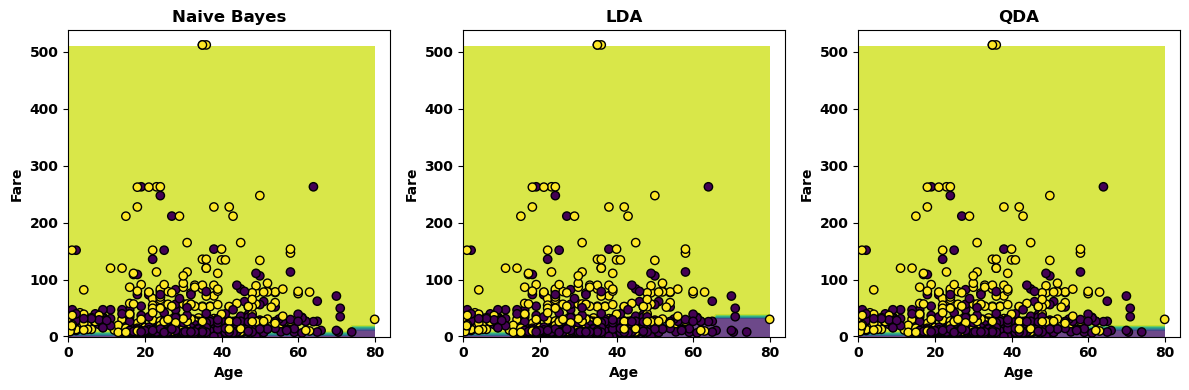

In [5]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Create a meshgrid of points
x_min, x_max = X['age'].min()-0.5, X['age'].max()+0.5
y_min, y_max = X['fare'].min()-0.5, X['fare'].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 10))

nb_pred = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
lda_pred = lda_model.predict(np.c_[xx.ravel(), yy.ravel()])
qda_pred = qda_model.predict(np.c_[xx.ravel(), yy.ravel()])

nb_pred = nb_pred.reshape(xx.shape)
lda_pred = lda_pred.reshape(xx.shape)
qda_pred = qda_pred.reshape(xx.shape)

# Plot the decision boundaries
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 4))

plt.subplot(1,3,1)
plt.contourf(xx, yy, nb_pred, alpha = 0.8)
plt.scatter(X['age'], X['fare'], c = y, edgecolor = "k")
plt.xlabel("Age")
plt.ylabel('Fare')
plt.title('Naive Bayes')

plt.subplot(1,3,2)
plt.contourf(xx, yy, lda_pred, alpha = 0.8)
plt.scatter(X['age'], X['fare'], c = y, edgecolor = "k")
plt.xlabel("Age")
plt.ylabel('Fare')
plt.title('LDA')

plt.subplot(1,3,3)
plt.contourf(xx, yy, qda_pred, alpha = 0.8)
plt.scatter(X['age'], X['fare'], c = y, edgecolor = "k")
plt.xlabel("Age")
plt.ylabel('Fare')
plt.title('QDA')

plt.tight_layout()
plt.show()

4. Now fit the models again with all variables. Make sure you have convert the categorical variables to factors. Report the classification table for each models. Which one performs the best? (20)

In [6]:
X = pd.get_dummies(X, columns = ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'])

In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)
nb_report = classification_report(y_test, nb_pred, target_names=target_names)
print("Naive Bayes Classification Report:\n", nb_report)

lda_pred = lda_model.predict(X_test)
lda_report = classification_report(y_test, lda_pred, target_names=target_names)
print("LDA Classification Report:\n", lda_report)

qda_pred = qda_model.predict(X_test)
qda_report = classification_report(y_test, qda_pred, target_names=target_names)
print("QDA Classification Report:\n", qda_report)

Naive Bayes Classification Report:
                  precision    recall  f1-score   support

Did not survive       1.00      1.00      1.00       125
       Survived       1.00      1.00      1.00        89

       accuracy                           1.00       214
      macro avg       1.00      1.00      1.00       214
   weighted avg       1.00      1.00      1.00       214

LDA Classification Report:
                  precision    recall  f1-score   support

Did not survive       0.84      0.90      0.87       125
       Survived       0.85      0.76      0.80        89

       accuracy                           0.85       214
      macro avg       0.85      0.83      0.84       214
   weighted avg       0.85      0.85      0.84       214

QDA Classification Report:
                  precision    recall  f1-score   support

Did not survive       1.00      1.00      1.00       125
       Survived       1.00      1.00      1.00        89

       accuracy                           1.0

We see that both the NB and QDA models have 100% accuracy which is better than the 85% accurate LDA model.
However, the Naive Bayes model is a simpler model to compute and hence this is the best model for this case.

### Question 2: Simulation study (10)

In the following simulation study, please write a sentence to discuss what this simulation code is doing and what you have seen in the figure.  

In [8]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(4400)

# Define the range of dataset sizes
noises = np.arange(0,1,0.05)

# Initialize lists to store accuracy and time results
accuracy_nb = []
accuracy_lda = []
accuracy_qda = []

In [9]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

for noise in noises:
    
    # Generate a random classification dataset
    X1 = np.random.normal(5, 1, 1000)
    X2 = np.random.normal(0, 1, 1000)
    X3 = np.random.normal(2, 1, 1000)
    X4 = np.random.normal(-3, 2, 1000)
    X = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4})
    y = np.where(X1 > 5, 'group1', 'group2')

    indices_to_change = np.random.choice(1000, 
                                         size=int(noise * 1000), 
                                         replace=False)

    for index in indices_to_change:
        if y[index] == 'group1':
            y[index] = 'group2'
        else:
            y[index] = 'group1'

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        random_state=4400)

    # Fit Naive Bayes model and calculate accuracy and time
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    accuracy_nb.append(nb_model.score(X_test, y_test))

    # Fit LDA model and calculate accuracy and time
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(X_train, y_train)
    accuracy_lda.append(lda_model.score(X_test, y_test))
    
    # Fit QDA model and calculate accuracy and time
    qda_model = QuadraticDiscriminantAnalysis()
    qda_model.fit(X_train, y_train)
    accuracy_qda.append(qda_model.score(X_test, y_test))    

The simulation study is assessing and comparing the accuracy of three different classification algorithms (Naive Bayes, LDA, and QDA) across various levels of dataset noise to determine their robustness in classifying data points as noise increases. Noise is introduced by randomly changing the labels of a portion of the data points.

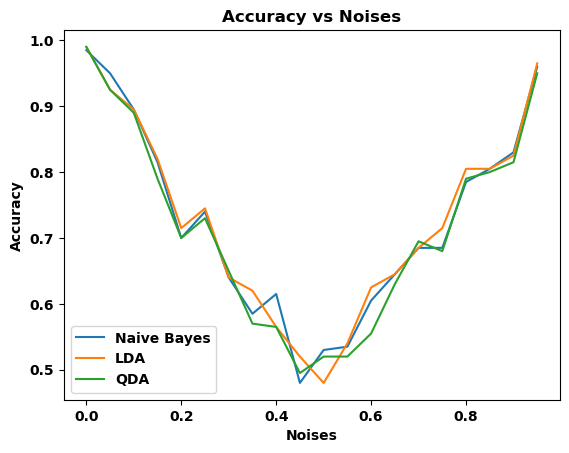

In [10]:
import matplotlib.pyplot as plt

plt.plot(noises, accuracy_nb, label='Naive Bayes')
plt.plot(noises, accuracy_lda, label='LDA')
plt.plot(noises, accuracy_qda, label='QDA')
plt.xlabel('Noises')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Noises')
plt.legend()
plt.show()

The first thing I noticed is that all models have the lowest accuracy when the noise percentage is between 40 and 50%. We see that NB has this lowest accuracy when noise is closer to 40% while LDA has it when noise is closer to 50%. Another thing is that QDA's lowest accuracy is slighlty better than the lowest accuracy for the other models, and this is likely due to the higher flexibility of QDA since it fits a quadratic decision boundary. Moreover, NB's accuracy is very similar to LDA's accuracy throghout the whole study, and there are cases when NB's accuracy is higher while LDA's accuracy is lower, and vice-versa (these accuracies oscillate). Lastly, I observed that QDA performed the worst overall which I found surprising since this model is the most computational demanding out of the 3 models.

### Question 3: Compare the models (20)

Please summarize the similarity and difference between Naive Bayes, LDA and QDA. Wirte at least three similarities between the models and at least two difference for each model. Hint: think about the how the models are proposed, the assumptions and the decision boundary etc.

Similarities between NB, LDA, and QDA models:
- All 3 models can be used for classification tasks (supervised learning);
- Probabilistic Modeling: all 3 models are probabilistic classification models that estimate class probabilities for each data point based on its feature values;
- Generative Models: all 3 models learn how the data is generated, given certain parameters, and can be used to generate synthetic data that is similar to the observed data.

Differences between NB and LDA:
- NB's decision boundary is not linear as opposed to the LDA's linear boundary;
- NB assumes that all features are conditionally independent while LDA's main assumption is that data within each class follows   a multivariate Gaussian distribution, and it assumes that these multivariate Gaussian distributions have a shared covariance   matrix across all classes.

Differences between NB and QDA:
- NB assumes that all features are conditionally independent while QDA models the correlations between features within each class and allows for class-specific covariance matrices;
- NB decision boundaries are not linear but they're simple due to independence assumption. QDA decision boundaries are quadratic.

Differences between LDA and QDA:
- LDA decision boundaries are linear as opposed to the quadratic boundaries from the QDA model;
- LDA assumes that all classes share a common covariance matrix, and QDA models the correlations between features within each class and allows for class-specific covariance matrices.